In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
data = pd.read_excel("maliciousornot.xlsx")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

In [4]:
data.corr()["Type"].sort_values()

URL_LENGTH                  -0.228422
SOURCE_I                    -0.138708
SOURCE_B                    -0.128587
SOURCE_APP_BYTES            -0.086080
SOURCE_C                    -0.075369
REMOTE_APP_BYTES            -0.048806
SOURCE_G                    -0.017433
DNS_QUERY_TIMES             -0.011055
SOURCE_F                    -0.007551
SOURCE_E                     0.001985
SOURCE_L                     0.022932
SOURCE_D                     0.029479
SOURCE_H                     0.055045
SOURCE_O                     0.063622
SOURCE_R                     0.069140
SOURCE_N                     0.088076
APP_BYTES                    0.096659
REMOTE_IPS                   0.126232
SOURCE_APP_PACKETS           0.129433
REMOTE_APP_PACKETS           0.139874
SOURCE_S                     0.141134
SOURCE_P                     0.205141
APP_PACKETS                  0.240818
NUMBER_SPECIAL_CHARACTERS    0.412095
SOURCE_J                     0.453197
SOURCE_A                     0.536539
DIST_REMOTE_

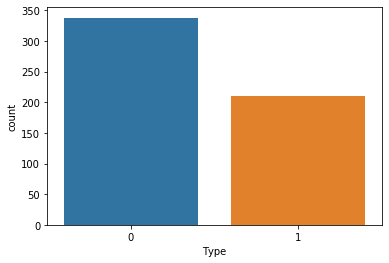

In [5]:
sbn.countplot("Type", data = data)

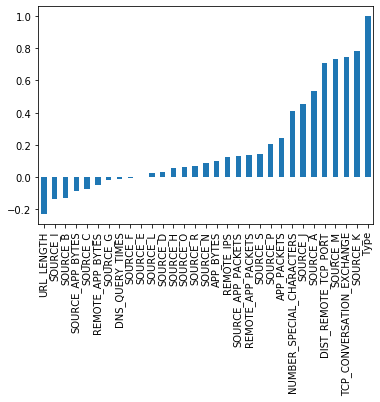

In [6]:
data.corr()["Type"].sort_values().plot(kind="bar")

In [7]:
y = data["Type"].values
x = data.drop("Type", axis =1).values
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 15)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

In [11]:
scaler.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [12]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
x_train.shape

(383, 30)

In [17]:
model = Sequential()
model.add(Dense(units = 30, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))

model.add(Dense(units = 1, activation = "sigmoid"))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [18]:
model.compile(loss = "binary_crossentropy",optimizer = "adam")

In [19]:
model.fit(x = x_train, y = y_train, validation_data= (x_test,y_test),verbose = 1, epochs =700 )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 383 samples, validate on 165 samples
Epoch 1/700
383/383 [==============================] - 1s 3ms/sample - loss: 0.6864 - val_loss: 0.6986
Epoch 2/700
383/383 [==============================] - 0s 102us/sample - loss: 0.6737 - val_loss: 0.6958
Epoch 3/700
383/383 [==============================] - 0s 101us/sample - loss: 0.6618 - val_loss: 0.6898
Epoch 4/700
383/383 [==============================] - 0s 106us/sample - loss: 0.6486 - val_loss: 0.6848
Epoch 5/700
383/383 [==============================] - 0s 104us/sample - loss: 0.6311 - val_loss: 0.6729
Epoch 6/700
383/383 [==============================] - 0s 105us/sample - loss: 0.6081 - val_loss: 0.6565
Epoch 7/700
383/383 [==============================] - 0s 100us/sample - loss: 0.5776 - val_loss: 0.6323
Epoch 8/700
383/383 [==============================] - 0s 103us/sample - loss: 0.5398 - val_loss: 0.6074
Epoch 9/700
383/383 [=

383/383 [==============================] - 0s 162us/sample - loss: 0.0639 - val_loss: 0.2106
Epoch 76/700
383/383 [==============================] - 0s 167us/sample - loss: 0.0605 - val_loss: 0.2052
Epoch 77/700
383/383 [==============================] - 0s 157us/sample - loss: 0.0625 - val_loss: 0.2149
Epoch 78/700
383/383 [==============================] - 0s 160us/sample - loss: 0.0602 - val_loss: 0.2126
Epoch 79/700
383/383 [==============================] - 0s 165us/sample - loss: 0.0570 - val_loss: 0.2072
Epoch 80/700
383/383 [==============================] - 0s 164us/sample - loss: 0.0563 - val_loss: 0.2067
Epoch 81/700
383/383 [==============================] - 0s 182us/sample - loss: 0.0574 - val_loss: 0.2066
Epoch 82/700
383/383 [==============================] - 0s 165us/sample - loss: 0.0584 - val_loss: 0.2139
Epoch 83/700
383/383 [==============================] - 0s 169us/sample - loss: 0.0570 - val_loss: 0.2072
Epoch 84/700
383/383 [==============================] - 0s 

Epoch 152/700
383/383 [==============================] - 0s 143us/sample - loss: 0.0263 - val_loss: 0.2118
Epoch 153/700
383/383 [==============================] - 0s 143us/sample - loss: 0.0251 - val_loss: 0.2059
Epoch 154/700
383/383 [==============================] - 0s 157us/sample - loss: 0.0263 - val_loss: 0.2128
Epoch 155/700
383/383 [==============================] - 0s 166us/sample - loss: 0.0234 - val_loss: 0.2126
Epoch 156/700
383/383 [==============================] - 0s 159us/sample - loss: 0.0245 - val_loss: 0.2123
Epoch 157/700
383/383 [==============================] - 0s 146us/sample - loss: 0.0242 - val_loss: 0.2115
Epoch 158/700
383/383 [==============================] - 0s 147us/sample - loss: 0.0260 - val_loss: 0.2098
Epoch 159/700
383/383 [==============================] - 0s 144us/sample - loss: 0.0337 - val_loss: 0.2284
Epoch 160/700
383/383 [==============================] - 0s 144us/sample - loss: 0.0301 - val_loss: 0.2134
Epoch 161/700
383/383 [==============

Epoch 229/700
383/383 [==============================] - 0s 60us/sample - loss: 0.0133 - val_loss: 0.2627
Epoch 230/700
383/383 [==============================] - 0s 61us/sample - loss: 0.0115 - val_loss: 0.2633
Epoch 231/700
383/383 [==============================] - 0s 79us/sample - loss: 0.0125 - val_loss: 0.2686
Epoch 232/700
383/383 [==============================] - ETA: 0s - loss: 0.008 - 0s 117us/sample - loss: 0.0138 - val_loss: 0.2637
Epoch 233/700
383/383 [==============================] - 0s 115us/sample - loss: 0.0120 - val_loss: 0.2739
Epoch 234/700
383/383 [==============================] - 0s 120us/sample - loss: 0.0120 - val_loss: 0.2616
Epoch 235/700
383/383 [==============================] - 0s 127us/sample - loss: 0.0116 - val_loss: 0.2653
Epoch 236/700
383/383 [==============================] - 0s 157us/sample - loss: 0.0132 - val_loss: 0.2785
Epoch 237/700
383/383 [==============================] - 0s 151us/sample - loss: 0.0163 - val_loss: 0.2641
Epoch 238/700
38

383/383 [==============================] - 0s 173us/sample - loss: 0.0063 - val_loss: 0.3420
Epoch 306/700
383/383 [==============================] - 0s 168us/sample - loss: 0.0064 - val_loss: 0.3282
Epoch 307/700
383/383 [==============================] - 0s 166us/sample - loss: 0.0065 - val_loss: 0.3566
Epoch 308/700
383/383 [==============================] - 0s 160us/sample - loss: 0.0062 - val_loss: 0.3296
Epoch 309/700
383/383 [==============================] - 0s 159us/sample - loss: 0.0063 - val_loss: 0.3443
Epoch 310/700
383/383 [==============================] - 0s 161us/sample - loss: 0.0057 - val_loss: 0.3309
Epoch 311/700
383/383 [==============================] - 0s 159us/sample - loss: 0.0065 - val_loss: 0.3333
Epoch 312/700
383/383 [==============================] - 0s 169us/sample - loss: 0.0068 - val_loss: 0.3408
Epoch 313/700
383/383 [==============================] - 0s 161us/sample - loss: 0.0055 - val_loss: 0.3396
Epoch 314/700
383/383 [============================

Epoch 382/700
383/383 [==============================] - 0s 124us/sample - loss: 0.0030 - val_loss: 0.4192
Epoch 383/700
383/383 [==============================] - 0s 123us/sample - loss: 0.0034 - val_loss: 0.4139
Epoch 384/700
383/383 [==============================] - 0s 112us/sample - loss: 0.0036 - val_loss: 0.4271
Epoch 385/700
383/383 [==============================] - 0s 152us/sample - loss: 0.0027 - val_loss: 0.4124
Epoch 386/700
383/383 [==============================] - 0s 143us/sample - loss: 0.0037 - val_loss: 0.4314
Epoch 387/700
383/383 [==============================] - 0s 145us/sample - loss: 0.0040 - val_loss: 0.4288
Epoch 388/700
383/383 [==============================] - 0s 144us/sample - loss: 0.0038 - val_loss: 0.4167
Epoch 389/700
383/383 [==============================] - 0s 142us/sample - loss: 0.0044 - val_loss: 0.4625
Epoch 390/700
383/383 [==============================] - 0s 141us/sample - loss: 0.0042 - val_loss: 0.4237
Epoch 391/700
383/383 [==============

383/383 [==============================] - 0s 60us/sample - loss: 0.0018 - val_loss: 0.5072
Epoch 459/700
383/383 [==============================] - 0s 63us/sample - loss: 0.0014 - val_loss: 0.5030
Epoch 460/700
383/383 [==============================] - 0s 56us/sample - loss: 0.0019 - val_loss: 0.5177
Epoch 461/700
383/383 [==============================] - 0s 60us/sample - loss: 0.0013 - val_loss: 0.5065
Epoch 462/700
383/383 [==============================] - 0s 54us/sample - loss: 0.0014 - val_loss: 0.5155
Epoch 463/700
383/383 [==============================] - 0s 57us/sample - loss: 0.0015 - val_loss: 0.5139
Epoch 464/700
383/383 [==============================] - 0s 60us/sample - loss: 0.0018 - val_loss: 0.5080
Epoch 465/700
383/383 [==============================] - 0s 56us/sample - loss: 0.0017 - val_loss: 0.5179
Epoch 466/700
383/383 [==============================] - 0s 57us/sample - loss: 0.0015 - val_loss: 0.5155
Epoch 467/700
383/383 [==============================] - 0s 

383/383 [==============================] - 0s 161us/sample - loss: 0.0010 - val_loss: 0.5403
Epoch 535/700
383/383 [==============================] - 0s 157us/sample - loss: 0.0012 - val_loss: 0.5563
Epoch 536/700
383/383 [==============================] - 0s 181us/sample - loss: 0.0011 - val_loss: 0.5427
Epoch 537/700
383/383 [==============================] - 0s 157us/sample - loss: 9.7207e-04 - val_loss: 0.5613
Epoch 538/700
383/383 [==============================] - 0s 156us/sample - loss: 8.0783e-04 - val_loss: 0.5516
Epoch 539/700
383/383 [==============================] - 0s 156us/sample - loss: 9.2935e-04 - val_loss: 0.5457
Epoch 540/700
383/383 [==============================] - 0s 158us/sample - loss: 9.1659e-04 - val_loss: 0.5532
Epoch 541/700
383/383 [==============================] - 0s 154us/sample - loss: 9.3502e-04 - val_loss: 0.5509
Epoch 542/700
383/383 [==============================] - 0s 156us/sample - loss: 7.5810e-04 - val_loss: 0.5547
Epoch 543/700
383/383 [====

383/383 [==============================] - 0s 113us/sample - loss: 7.8876e-04 - val_loss: 0.5988
Epoch 609/700
383/383 [==============================] - 0s 110us/sample - loss: 5.9116e-04 - val_loss: 0.6185
Epoch 610/700
383/383 [==============================] - 0s 149us/sample - loss: 6.2421e-04 - val_loss: 0.6019
Epoch 611/700
383/383 [==============================] - 0s 154us/sample - loss: 4.9959e-04 - val_loss: 0.6103
Epoch 612/700
383/383 [==============================] - 0s 159us/sample - loss: 5.6192e-04 - val_loss: 0.6033
Epoch 613/700
383/383 [==============================] - 0s 158us/sample - loss: 8.3022e-04 - val_loss: 0.6075
Epoch 614/700
383/383 [==============================] - 0s 161us/sample - loss: 6.8064e-04 - val_loss: 0.6059
Epoch 615/700
383/383 [==============================] - 0s 158us/sample - loss: 4.8315e-04 - val_loss: 0.6135
Epoch 616/700
383/383 [==============================] - 0s 155us/sample - loss: 5.4587e-04 - val_loss: 0.6084
Epoch 617/700
3

Epoch 682/700
383/383 [==============================] - 0s 157us/sample - loss: 2.9006e-04 - val_loss: 0.6534
Epoch 683/700
383/383 [==============================] - 0s 157us/sample - loss: 3.3666e-04 - val_loss: 0.6601
Epoch 684/700
383/383 [==============================] - 0s 154us/sample - loss: 4.5912e-04 - val_loss: 0.6496
Epoch 685/700
383/383 [==============================] - 0s 157us/sample - loss: 4.4415e-04 - val_loss: 0.6629
Epoch 686/700
383/383 [==============================] - 0s 162us/sample - loss: 3.5653e-04 - val_loss: 0.6511
Epoch 687/700
383/383 [==============================] - 0s 154us/sample - loss: 3.1772e-04 - val_loss: 0.6531
Epoch 688/700
383/383 [==============================] - 0s 154us/sample - loss: 2.4118e-04 - val_loss: 0.6728
Epoch 689/700
383/383 [==============================] - 0s 159us/sample - loss: 3.3552e-04 - val_loss: 0.6580
Epoch 690/700
383/383 [==============================] - 0s 159us/sample - loss: 3.2433e-04 - val_loss: 0.6577
E

In [22]:
modelkaybı = pd.DataFrame(model.history.history)

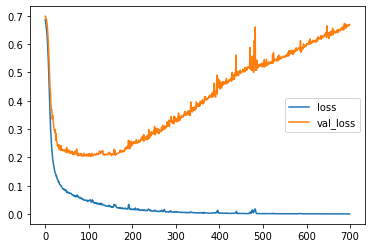

In [23]:
modelkaybı.plot() #model sapıttı earyl stoppng kullanc

In [24]:
model = Sequential()
model.add(Dense(units = 30, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))

model.add(Dense(units = 1, activation = "sigmoid"))
model.compile(loss = "binary_crossentropy",optimizer = "adam")

In [25]:
earlyStop = EarlyStopping(monitor = "val_loss",mode = "min", verbose = 1,patience=25)

In [26]:
model.fit(x=x_train,y=y_train,epochs=700,validation_data=(x_test,y_test),verbose = 1, callbacks=[earlyStop])

Train on 383 samples, validate on 165 samples
Epoch 1/700
383/383 [==============================] - 0s 1ms/sample - loss: 0.6906 - val_loss: 0.6808
Epoch 2/700
383/383 [==============================] - 0s 75us/sample - loss: 0.6671 - val_loss: 0.6635
Epoch 3/700
383/383 [==============================] - 0s 69us/sample - loss: 0.6417 - val_loss: 0.6431
Epoch 4/700
383/383 [==============================] - 0s 74us/sample - loss: 0.6101 - val_loss: 0.6212
Epoch 5/700
383/383 [==============================] - 0s 83us/sample - loss: 0.5683 - val_loss: 0.5831
Epoch 6/700
383/383 [==============================] - 0s 68us/sample - loss: 0.5228 - val_loss: 0.5524
Epoch 7/700
383/383 [==============================] - 0s 72us/sample - loss: 0.4731 - val_loss: 0.5106
Epoch 8/700
383/383 [==============================] - 0s 73us/sample - loss: 0.4235 - val_loss: 0.4803
Epoch 9/700
383/383 [==============================] - 0s 72us/sample - loss: 0.3751 - val_loss: 0.4439
Epoch 10/700
383/38

383/383 [==============================] - 0s 151us/sample - loss: 0.0531 - val_loss: 0.2159
Epoch 79/700
383/383 [==============================] - 0s 156us/sample - loss: 0.0546 - val_loss: 0.2015
Epoch 80/700
383/383 [==============================] - 0s 151us/sample - loss: 0.0524 - val_loss: 0.2090
Epoch 81/700
383/383 [==============================] - 0s 151us/sample - loss: 0.0548 - val_loss: 0.2005
Epoch 82/700
383/383 [==============================] - 0s 154us/sample - loss: 0.0521 - val_loss: 0.1978
Epoch 83/700
383/383 [==============================] - 0s 155us/sample - loss: 0.0521 - val_loss: 0.1951
Epoch 84/700
383/383 [==============================] - 0s 152us/sample - loss: 0.0513 - val_loss: 0.2037
Epoch 85/700
383/383 [==============================] - 0s 155us/sample - loss: 0.0530 - val_loss: 0.1939
Epoch 86/700
383/383 [==============================] - 0s 149us/sample - loss: 0.0506 - val_loss: 0.1954
Epoch 87/700
383/383 [==============================] - 0s 

In [27]:
modelkaybı = pd.DataFrame(model.history.history)

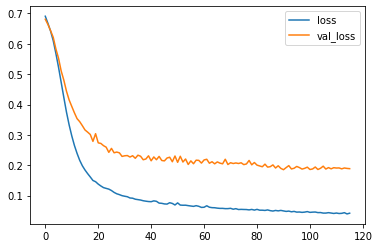

In [28]:
modelkaybı.plot()

In [29]:
model = Sequential()
model.add(Dense(units = 30, activation = "relu"))
model.add(Dropout(0.6))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dropout(0.6))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dropout(0.6))

model.add(Dense(units = 1, activation = "sigmoid"))
model.compile(loss = "binary_crossentropy",optimizer = "adam")
earlyStop = EarlyStopping(monitor = "val_loss",mode = "min", verbose = 1,patience=25)
model.fit(x=x_train,y=y_train,epochs=700,validation_data=(x_test,y_test),verbose = 1, callbacks=[earlyStop])

Train on 383 samples, validate on 165 samples
Epoch 1/700
383/383 [==============================] - 0s 1ms/sample - loss: 0.7004 - val_loss: 0.7085
Epoch 2/700
383/383 [==============================] - 0s 154us/sample - loss: 0.7138 - val_loss: 0.7036
Epoch 3/700
383/383 [==============================] - 0s 166us/sample - loss: 0.6920 - val_loss: 0.6992
Epoch 4/700
383/383 [==============================] - 0s 138us/sample - loss: 0.7053 - val_loss: 0.6946
Epoch 5/700
383/383 [==============================] - 0s 109us/sample - loss: 0.6880 - val_loss: 0.6910
Epoch 6/700
383/383 [==============================] - 0s 110us/sample - loss: 0.6881 - val_loss: 0.6887
Epoch 7/700
383/383 [==============================] - 0s 168us/sample - loss: 0.6603 - val_loss: 0.6870
Epoch 8/700
383/383 [==============================] - 0s 178us/sample - loss: 0.6675 - val_loss: 0.6848
Epoch 9/700
383/383 [==============================] - 0s 176us/sample - loss: 0.6627 - val_loss: 0.6816
Epoch 10/70

383/383 [==============================] - 0s 176us/sample - loss: 0.3580 - val_loss: 0.3927
Epoch 74/700
383/383 [==============================] - 0s 173us/sample - loss: 0.3522 - val_loss: 0.3991
Epoch 75/700
383/383 [==============================] - 0s 168us/sample - loss: 0.3582 - val_loss: 0.4048
Epoch 76/700
383/383 [==============================] - 0s 178us/sample - loss: 0.3078 - val_loss: 0.3694
Epoch 77/700
383/383 [==============================] - 0s 180us/sample - loss: 0.3212 - val_loss: 0.3778
Epoch 78/700
383/383 [==============================] - 0s 191us/sample - loss: 0.3577 - val_loss: 0.3938
Epoch 79/700
383/383 [==============================] - 0s 187us/sample - loss: 0.3470 - val_loss: 0.3703
Epoch 80/700
383/383 [==============================] - 0s 185us/sample - loss: 0.3247 - val_loss: 0.3560
Epoch 81/700
383/383 [==============================] - 0s 178us/sample - loss: 0.2875 - val_loss: 0.3579
Epoch 82/700
383/383 [==============================] - 0s 

In [30]:
modelkaybı = pd.DataFrame(model.history.history)

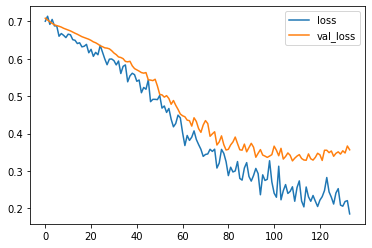

In [31]:
modelkaybı.plot()

In [32]:
tahminler = model.predict_classes(x_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
print(classification_report(y_test,tahminler))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89        91
           1       0.90      0.82      0.86        74

    accuracy                           0.88       165
   macro avg       0.88      0.87      0.88       165
weighted avg       0.88      0.88      0.88       165



In [35]:
print(confusion_matrix(y_test,tahminler)) #6 degeri yanlııs 85 dogru

[[84  7]
 [13 61]]
